In [1]:
!pip install tensorflow-gpu==2.0.0


In [2]:
!nvidia-smi

Fri Apr 30 07:40:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.models import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_path = '/content/drive/My Drive/COVID PROJECT/DataSet/Trains'
test_path = '/content/drive/My Drive/COVID PROJECT/DataSet/Tests'

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [9]:
train_set = train_data.flow_from_directory(train_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')
test_set = test_data.flow_from_directory(test_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')

Found 450 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [10]:
train_set.class_indices

{'negative': 0, 'positive': 1}

In [11]:
covid = model.fit(train_set,validation_data=test_set,epochs=20,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Train for 29 steps, validate for 6 steps
Epoch 1/20
29/29 [==============================] - 37s 1s/step - loss: 0.5102 - accuracy: 0.7933 - val_loss: 0.6404 - val_accuracy: 0.6707
Epoch 2/20
29/29 [==============================] - 16s 557ms/step - loss: 0.3909 - accuracy: 0.8178 - val_loss: 0.7391 - val_accuracy: 0.6707
Epoch 3/20
29/29 [==============================] - 16s 550ms/step - loss: 0.2817 - accuracy: 0.8178 - val_loss: 1.3014 - val_accuracy: 0.6707
Epoch 4/20
29/29 [==============================] - 16s 555ms/step - loss: 0.2327 - accuracy: 0.8644 - val_loss: 1.1129 - val_accuracy: 0.6707
Epoch 5/20
29/29 [==============================] - 16s 548ms/step - loss: 0.2030 - accuracy: 0.9333 - val_loss: 1.6283 - val_accuracy: 0.6707
Epoch 6/20
29/29 [==============================] - 16s 549ms/step - loss: 0.1984 - accuracy: 0.9289 - val_loss: 1.1528 - val_accuracy: 0.6585
Epoch 7/20
29/29 [==============================] - 16s 544ms/step - loss: 0.1844 - accuracy: 0.9444 - v

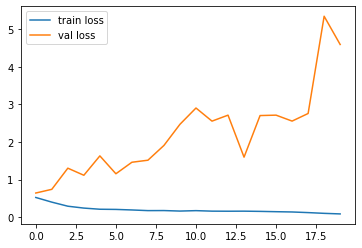

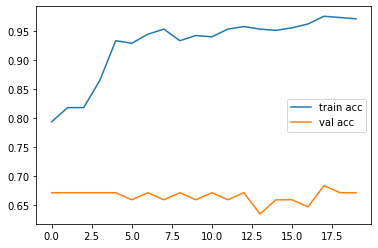

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(covid.history['loss'], label='train loss')
plt.plot(covid.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(covid.history['accuracy'], label='train acc')
plt.plot(covid.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
!pip install pyyaml h5py

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
model.save('/content/drive/My Drive/COVID PROJECT/covid.h5')